# 6.2 Exploring relationships

### This script contains the following:

#### Importing Visualization Libraries and Data

#### Exploring Relationships (6.2 answers)
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#### Note about matplotlib:

There are certain bugs associated with some versions of matplotlib. Before you start your analysis, you should check what version you have by typing `matplotlib.__version__` in a Jupyter cell and executing it. If it shows version 3.1.1, you'll likely experience some problems with the way the heatmap appears.

To circumvent this, we recommend opening a new Anaconda terminal and executing this command: `conda update --all`. This will update all of your packages and install the newest version of matplotlib, where this bug has been fixed. 

Then, restart the kernel for your notebook (so it can pick up any changes to your library versions) and rerun your code, which will re-import the libraries in your notebook. Check the version again, and you should have the latest version installed.

In [2]:
matplotlib.__version__

'3.4.3'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = 'C:/Users/rstev/Documents/06_22 Etsy Top 10000 Sellers'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, 'Data', 'Etsy Top Sellers Data_Prepared v3.csv'))

In [6]:
df.shape

(10000, 26)

In [7]:
df.columns

Index(['Unnamed: 0', 'shop_id', 'shop_name', 'url', 'shop_create_date',
       'month_create', 'year_create', 'shop_update_date', 'sold_count',
       'additional_customization', 'active_listing_count', 'city', 'state',
       'country', 'headline', 'favorites_count', 'average_rating',
       'total_rating_count', 'average_rating_count', 'accepts_direct_checkout',
       'accepts_paypal', 'ships_to_country_ids', 'is_eligible_free_shipping',
       'has_min_free_shipping', 'has_free_shipping', 'ships_to_regions'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0                     int64
shop_id                        int64
shop_name                     object
url                           object
shop_create_date              object
month_create                  object
year_create                    int64
shop_update_date               int64
sold_count                     int64
additional_customization        bool
active_listing_count           int64
city                          object
state                         object
country                       object
headline                      object
favorites_count                int64
average_rating               float64
total_rating_count             int64
average_rating_count           int64
accepts_direct_checkout         bool
accepts_paypal                  bool
ships_to_country_ids          object
is_eligible_free_shipping       bool
has_min_free_shipping           bool
has_free_shipping               bool
ships_to_regions              object
dtype: object

In [9]:
df.head()

,Unnamed: 0,shop_id,shop_name,url,shop_create_date,month_create,year_create,shop_update_date,sold_count,additional_customization,...,average_rating,total_rating_count,average_rating_count,accepts_direct_checkout,accepts_paypal,ships_to_country_ids,is_eligible_free_shipping,has_min_free_shipping,has_free_shipping,ships_to_regions
0,0,6923427,kawaiistickers4you,https://www.etsy.com/shop/kawaiistickers4you,5/18/2012,May,2012,1643091607,27723,False,...,1.0,9628,1,False,True,"[193, 105, 99, 129, 215, 220, 128, 103, 165, 1...",True,True,True,NaN
1,1,5242648,JustForMeSewing,https://www.etsy.com/shop/JustForMeSewing,10/4/2010,October,2010,1632363895,39900,False,...,5.0,5470,1,True,False,"[209, 0, 79, 123, 61, 220]",True,True,True,NaN
2,2,5593341,SwellAndGrand,https://www.etsy.com/shop/SwellAndGrand,10/4/2010,October,2010,1640184600,33696,False,...,5.0,4595,1,True,False,"[0, 209]",True,True,True,NaN
3,3,6441254,PrettyThingsSupplies,https://www.etsy.com/shop/PrettyThingsSupplies,7/30/2011,July,2011,1647391292,29155,False,...,5.0,7851,1,True,False,"[79, 105, 93, 103, 61, 123, 91, 209, 0, 193, 1...",True,True,True,NaN
4,4,6176258,KangarooCare,https://www.etsy.com/shop/KangarooCare,1/17/2011,January,2011,1647708638,25779,True,...,5.0,3975,1,True,False,"[131, 191, 148, 189, 145, 165, 118, 100, 272, ...",True,True,True,NaN


In [11]:
# Create variable for years in business
df['years_in_business'] = 2022 - df['year_create']

In [14]:
df['years_in_business'].value_counts(dropna = False)

12    1595
7     1096
8     1065
9      926
6      901
10     861
5      828
11     747
4      720
2      598
3      591
1       72
Name: years_in_business, dtype: int64

In [15]:
df['year_create'].value_counts(dropna = False)

2010    1595
2015    1096
2014    1065
2013     926
2016     901
2012     861
2017     828
2011     747
2018     720
2020     598
2019     591
2021      72
Name: year_create, dtype: int64

### Exploring Relationships

### Correlations:

In [28]:
# Create a subset excluding the vars not needed for correlations
sub = df[['sold_count', 'additional_customization', 'active_listing_count', 'favorites_count','average_rating', 'total_rating_count', 'accepts_direct_checkout', 'accepts_paypal', 'has_free_shipping', 'years_in_business']]

In [29]:
sub

,sold_count,additional_customization,active_listing_count,favorites_count,average_rating,total_rating_count,accepts_direct_checkout,accepts_paypal,has_free_shipping,years_in_business
0,27723,False,2,6931,1.000,9628,False,True,True,10
1,39900,False,2,12500,5.000,5470,True,False,True,12
2,33696,False,5,13407,5.000,4595,True,False,True,12
3,29155,False,0,4649,5.000,7851,True,False,True,11
4,25779,True,12,12096,5.000,3975,True,False,True,11
...,...,...,...,...,...,...,...,...,...,...
9995,45580,False,65,6525,4.897,8931,True,False,True,9
9996,34882,False,50,3927,4.897,10521,True,False,True,11
9997,29698,False,0,5780,4.897,14206,True,False,True,12
9998,28208,False,14,3818,4.897,4748,True,False,True,10


In [30]:
# Create a correlation matrix using pandas

sub.corr()

,sold_count,additional_customization,active_listing_count,favorites_count,average_rating,total_rating_count,accepts_direct_checkout,accepts_paypal,has_free_shipping,years_in_business
sold_count,1.000000,0.100462,0.280297,0.479403,0.021553,0.833446,-0.007399,0.020957,0.012595,0.064096
additional_customization,0.100462,1.000000,0.034804,0.073661,-0.021502,0.067658,-0.024734,0.030434,0.140040,-0.072094
active_listing_count,0.280297,0.034804,1.000000,0.096518,-0.004823,0.214648,-0.061221,0.078810,-0.019624,0.015963
favorites_count,0.479403,0.073661,0.096518,1.000000,0.021398,0.546544,-0.000467,0.009329,0.052560,0.354733
average_rating,0.021553,-0.021502,-0.004823,0.021398,1.000000,0.079200,0.102385,-0.099454,-0.042901,0.115277
total_rating_count,0.833446,0.067658,0.214648,0.546544,0.079200,1.000000,0.025950,-0.017397,0.104929,0.214216
accepts_direct_checkout,-0.007399,-0.024734,-0.061221,-0.000467,0.102385,0.025950,1.000000,-0.942310,0.049557,0.060680
accepts_paypal,0.020957,0.030434,0.078810,0.009329,-0.099454,-0.017397,-0.942310,1.000000,-0.049600,-0.061050
has_free_shipping,0.012595,0.140040,-0.019624,0.052560,-0.042901,0.104929,0.049557,-0.049600,1.000000,0.056308
years_in_business,0.064096,-0.072094,0.015963,0.354733,0.115277,0.214216,0.060680,-0.061050,0.056308,1.000000


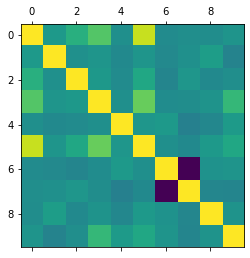

In [31]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

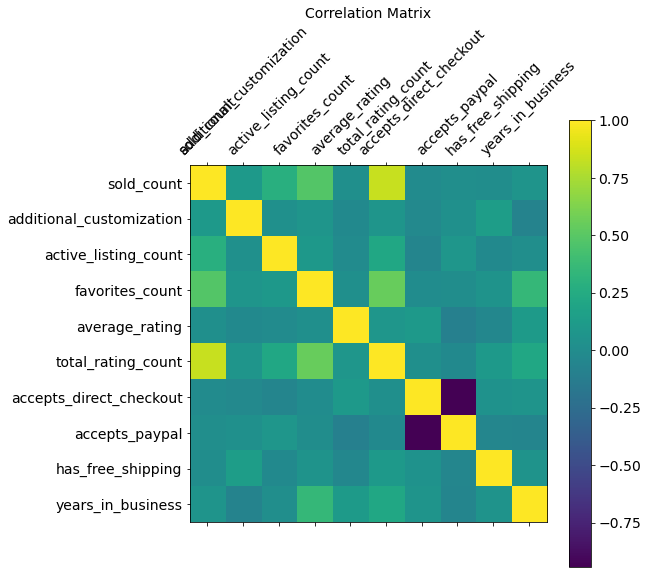

In [32]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

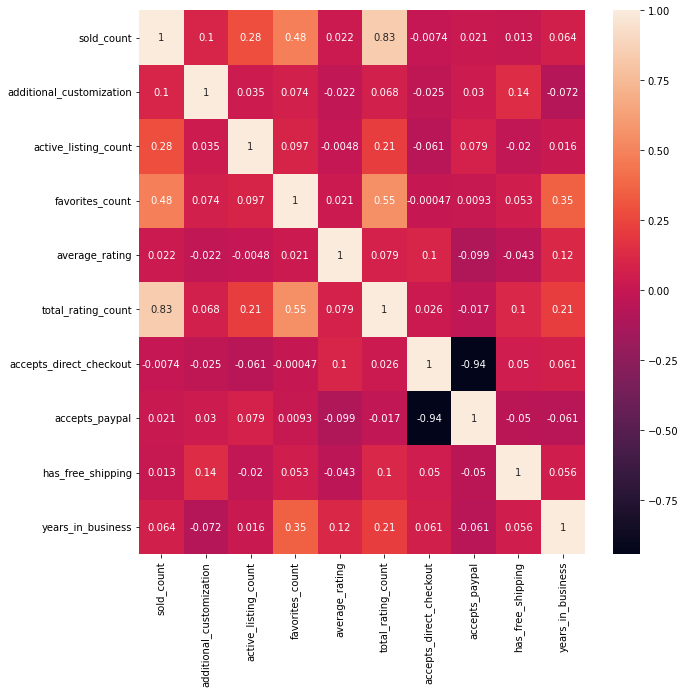

In [33]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Answer 6.2 #3. In the correlation matrix heatmap, I can easily see that certain factors influence the success of an Etsy shop. Total rating count and sold count have a strong, positive relationship, meaning having a high number of reviews leads to more units sold, and vice versa. Number of favorites is also positively correlated with units sold. Interestingly, years in business and features such as free shipping and offering direct checkout or PayPal payment have little correlation with average rating or units sold. 

### Scatterplots:

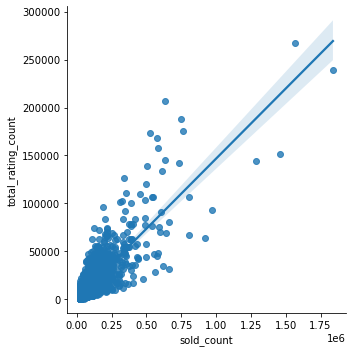

In [34]:
# Create a scatterplot for the "sold_count" and "total_rating_count" columns in seaborn

sns.lmplot(x = 'sold_count', y = 'total_rating_count', data = df)

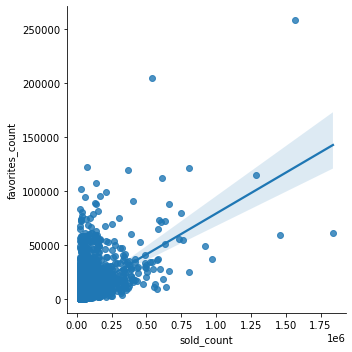

In [35]:
# Create a scatterplot for the "sold_count" and "favorites_count" columns in seaborn

sns.lmplot(x = 'sold_count', y = 'favorites_count', data = df)

### Answer 6.2 #4. I can see the strong positive relationships in the scatterplots really well, but it also shows me that there are a few outliers that might require a closer look.

### Pair Plots:

In [39]:
# Keep only the variables you want to use in the pair plot

sub_2 = df[['sold_count', 'active_listing_count', 'favorites_count','average_rating', 'total_rating_count']]

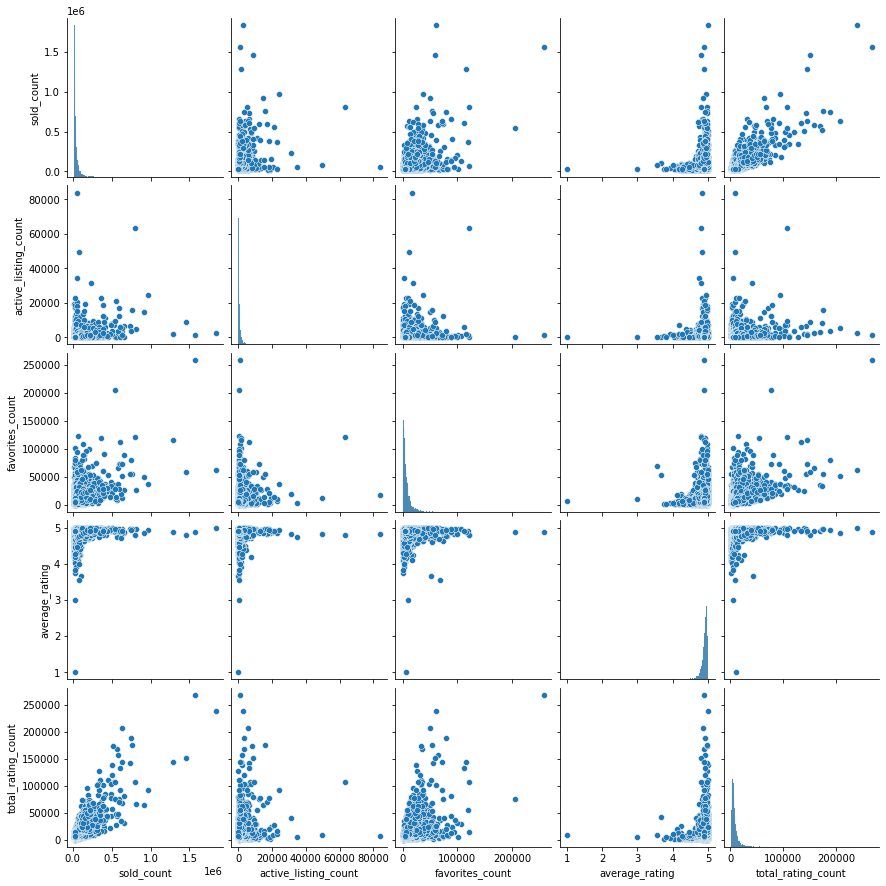

In [40]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### Answer 6.2 #5. The pair plots again highlight that there are a few outliers that may need further review, and also the positive relationships between sold_count, favorites_count, and total_rating_count. I think I will look further into active_listing_count and average_rating as well. It surprises me a little bit that average rating has little to no impact on units sold or overall favorites_count.

### Categorical Plots:

##### Creating a categorical variable that splits the "years_in_business" column into categories

<AxesSubplot:xlabel='years_in_business', ylabel='Count'>

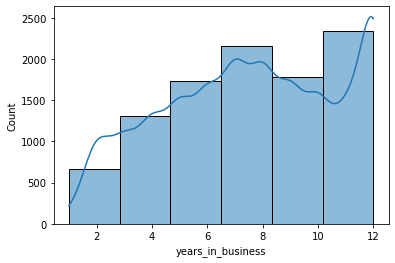

In [43]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['years_in_business'], bins = 6, kde = True)

In [44]:
df.loc[df['years_in_business'] < 5, 'tenure'] = 'New Seller'

In [45]:
df.loc[(df['years_in_business'] >= 5) & (df['years_in_business'] <= 9), 'tenure'] = 'Middle Seller'

In [46]:
df.loc[df['years_in_business'] >= 10, 'tenure'] = 'Tenured Seller'

In [47]:
df['years_in_business'].value_counts(dropna = False)

12    1595
7     1096
8     1065
9      926
6      901
10     861
5      828
11     747
4      720
2      598
3      591
1       72
Name: years_in_business, dtype: int64

In [49]:
df['tenure'].value_counts(dropna = False)

Middle Seller     4816
Tenured Seller    3203
New Seller        1981
Name: tenure, dtype: int64

In [48]:
df.columns

Index(['Unnamed: 0', 'shop_id', 'shop_name', 'url', 'shop_create_date',
       'month_create', 'year_create', 'shop_update_date', 'sold_count',
       'additional_customization', 'active_listing_count', 'city', 'state',
       'country', 'headline', 'favorites_count', 'average_rating',
       'total_rating_count', 'average_rating_count', 'accepts_direct_checkout',
       'accepts_paypal', 'ships_to_country_ids', 'is_eligible_free_shipping',
       'has_min_free_shipping', 'has_free_shipping', 'ships_to_regions',
       'years_in_business', 'tenure'],
      dtype='object')

In [ ]:
# Create a categorical plot in seaborn using the tenure var created above

sns.set(style="ticks")
g = sns.catplot(x="sold_count", y="favorites_count", hue="tenure", data=df)

### Answer 6.2 #6. I'm having trouble getting the categorical plot to run. I will check and get back to this.

### Answer 6.3 #7. Project questions:
      1. What factors contribute to a successful shop on the Etsy online marketplace? So far, I've found that the number of reviews and number of favorites a seller receives leads to higher inventory sold. 
      2. Do these factors vary by region/country? Cannot answer yet. 
      3. How does length of time in business impact overall ratings and inventory sold? Time in business does have a positive, somewhat weak relationship with number of ratings and favorites, but there is no relationship with amount of inventory sold. 
      4. What is the average rating of the top sellers on Etsy? I will look more into this, but overall, the average rating is 4.9. 
      5. What is the average number of favorites among top sellers on Etsy? I will look more into this question.
      6. Do factors such as free shipping, ability to customize, or acceptance of direct checkout or PayPayl payment impact total units sold? Based on the analysis done in this exercise, no, there is not much of a relationship between these factors and units sold. 